<a href="https://colab.research.google.com/github/RuthlessActuary2023/CAS-RPM-2026-Theory-to-Code/blob/main/2026_CAS_RPM_Python_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Generalized Linear Model (GLM)

## Import packages & data

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",25)
pd.set_option("display.max_rows",250)
pd.options.display.float_format = '{:,.2f}'.format

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from urllib.request import urlopen
import json

# import folium

# new packages to pip install
import random
from patsy import dmatrices
import statsmodels.api as sm

In [ ]:
# Code to clone the github repo into colab
!pip install gitpython
import git
import os

repo_url = 'https://github.com/RuthlessActuary2023/CAS-RPM-2025-Python-Workshop.git'
repo_dir = '/content/your-repo'

# Clone if it doesn’t already exist
if not os.path.exists(repo_dir):
    git.Repo.clone_from(repo_url, repo_dir)

In [ ]:
repo_dir = '/content/your-repo'
data5 = pd.read_feather(repo_dir + '/data5.ftr')

In [ ]:
data5.describe()

,pol_eff_year,ep_bi,ep_col,ee_bi,ee_col,incloss_bi,incloss_col,cc_bi,cc_col,modelyear,credit,commute_flag,...,wtd_avg_travel_time,diploma_ntile,pop_density_ntile,unemployment_ntile,modelyear_null_flag,Modeled_Annual_Mileage_null_flag,Estimated_Current_Mileage_null_flag,Annual_Mileage_Estimate_null_flag,Number_of_Titling_Transactions_null_flag,LOO_years_null_flag,curr_owner_odo_cnt_null_flag,all_owner_odo_cnt_null_flag
count,"100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00",...,"100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00","100,443.00"
mean,"2,016.78",97.77,160.20,0.56,0.56,56.07,77.67,0.00,0.02,"2,009.60",4.94,0.45,...,29.06,76.51,35.07,57.26,0.01,0.02,0.22,0.37,0.06,0.06,0.02,0.02
std,1.46,93.74,153.74,0.20,0.20,"2,561.46","1,107.89",0.06,0.15,5.71,2.69,0.50,...,5.77,28.52,25.74,24.65,0.11,0.14,0.41,0.48,0.24,0.24,0.14,0.14
min,"2,014.00",-7.00,-0.07,0.00,0.00,0.00,-750.04,0.00,0.00,"1,949.00",1.00,0.00,...,8.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,016.00",50.00,74.05,0.50,0.50,0.00,0.00,0.00,0.00,"2,006.00",3.00,0.00,...,25.00,63.50,12.00,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,017.00",75.00,123.00,0.50,0.50,0.00,0.00,0.00,0.00,"2,010.00",5.00,0.00,...,28.00,90.00,26.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,018.00",114.00,195.00,0.50,0.50,0.00,0.00,0.00,0.00,"2,014.00",7.00,1.00,...,32.00,98.00,56.00,77.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,"2,019.00","3,074.56","6,615.00",1.10,1.10,"496,636.60","205,193.28",6.00,8.00,"2,021.00",10.00,1.00,...,50.00,100.00,96.00,100.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
data5.head()

,pol_eff_year,ep_bi,ep_col,ee_bi,ee_col,incloss_bi,incloss_col,cc_bi,cc_col,modelyear,zip,pol_id,...,wtd_avg_travel_time,diploma_ntile,pop_density_ntile,unemployment_ntile,modelyear_null_flag,Modeled_Annual_Mileage_null_flag,Estimated_Current_Mileage_null_flag,Annual_Mileage_Estimate_null_flag,Number_of_Titling_Transactions_null_flag,LOO_years_null_flag,curr_owner_odo_cnt_null_flag,all_owner_odo_cnt_null_flag
0,2015,161.00,419.00,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,26.00,52.00,58.00,51.00,0,0,0,1,0,0,0,0
1,2017,269.00,416.00,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,26.00,52.00,58.00,51.00,0,0,0,0,0,0,0,0
2,2014,105.57,315.06,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,26.00,52.00,58.00,51.00,0,0,0,0,0,0,0,0
3,2016,258.00,425.00,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,26.00,52.00,58.00,51.00,0,0,0,0,0,0,0,0
4,2014,23.83,55.72,0.17,0.17,0.00,0.00,0,0,"2,007.00",45424,0,...,26.00,52.00,58.00,51.00,0,0,1,1,0,0,0,0


In [ ]:
[i for i in data5]

['pol_eff_year',
 'ep_bi',
 'ep_col',
 'ee_bi',
 'ee_col',
 'incloss_bi',
 'incloss_col',
 'cc_bi',
 'cc_col',
 'modelyear',
 'zip',
 'pol_id',
 'vin_id',
 'credit',
 'commute_flag',
 'veh_count_box',
 'driver_count_box',
 'veh_age_box',
 'coll_symb_ntile',
 'limit_bi',
 'ded_coll',
 'DrvAge_box',
 'male',
 'single',
 'widowed',
 'Date',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Severe_Accident_flag',
 'Other_Severe_Problem_flag',
 'Failed_Emissions_flag',
 'Nonsevere_Accident_flag',
 'Damage_flag',
 'Collision_Repair_Facility_flag',
 'Potential_Damage_flag',
 

## Data setup

In [ ]:
### Let's remove some columns we don't need and fix some data issues

print(data5.shape)
data5.drop(columns = ['zip','pol_id','vin_id','Date'], inplace = True)
print(data5.shape)

cols = ['ep_bi','ep_col','incloss_bi','incloss_col']
for col in cols:
  data5[col] = np.maximum(data5[col],0)

(100443, 68)
(100443, 64)


In [ ]:
### First we need to split data into train and test

df = data5.copy() # make a copy in case we mess something up, leaving the original intact

for cov in ['bi','col']:
  df['pp_' + cov] = df['incloss_' + cov]/df['ee_' + cov]
  df['lr_' + cov] = df['incloss_' + cov]/df['ep_' + cov]
  df['freq_' + cov] = df['cc_' + cov]/df['ee_' + cov]
  df['sev_' + cov] = df['incloss_' + cov]/df['cc_' + cov]

def tt_split(data,train_size): # simple random split here, but can customize to stratify by zip code, for example based on your specific model and preference
    np.random.seed(seed=42)
    data['rand'] = np.random.randint(1, 101, data.shape[0])/100

    data1_train = data.loc[data['rand'] <= train_size].copy()
    data1_test = data.loc[data['rand'] > train_size].copy()

    del data1_train['rand']
    del data1_test['rand']

    return data1_train, data1_test

d_train, d_test = tt_split(df,.80)

print(d_train.shape, d_test.shape)

(80135, 72) (20308, 72)


## Fit Initial GLM & Residual Plot function

In [ ]:
### Start with basic PP GLM fit using credit; statsmodels package

model_construction = 'pp_col ~ credit'

y_train, X_train = dmatrices(model_construction, data=d_train, return_type='dataframe')
y_test, X_test = dmatrices(model_construction, data=d_test, return_type='dataframe')

glm = sm.GLM(y_train, X_train, family=sm.families.Tweedie(var_power = 1.4), var_weights=d_train['ee_col'])
glm_results = glm.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 pp_col   No. Observations:                80135
Model:                            GLM   Df Residuals:                    80133
Model Family:                 Tweedie   Df Model:                            1
Link Function:                    Log   Scale:                          3556.4
Method:                          IRLS   Log-Likelihood:                -26668.
Date:                Wed, 18 Feb 2026   Deviance:                   5.7952e+06
Time:                        15:06:29   Pearson chi2:                 2.85e+08
No. Iterations:                     9   Pseudo R-squ. (CS):          0.0004592
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1529      0.147     28.228      0.0

In [ ]:
### Residual plot function - actual vs predicted

def resid_plot(data,feature,act,pred,weight):
    x = data.groupby([feature]).agg({weight: 'sum', act: 'sum', pred: 'sum'}).reset_index()
    x['act'] = x[act]/x[weight]
    x['pred'] = x[pred]/x[weight]

    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    y_max = np.where(x['act'].max() > x['pred'].max(),x['act'].max(),x['pred'].max())*1.20
    ax2.set_ylim(0,y_max)

    x[weight].plot.bar(stacked=False, ax=ax, alpha=0.6)
    x['act'].plot(kind='line', ax=ax2, marker='o',linewidth = 0, legend='act')
    x['pred'].plot(kind='line', ax=ax2, marker='o', legend='pred')

    plt.xticks(ticks = x.index, labels = x[feature])

    ax.set(ylabel=weight, title = feature)
    plt.show()

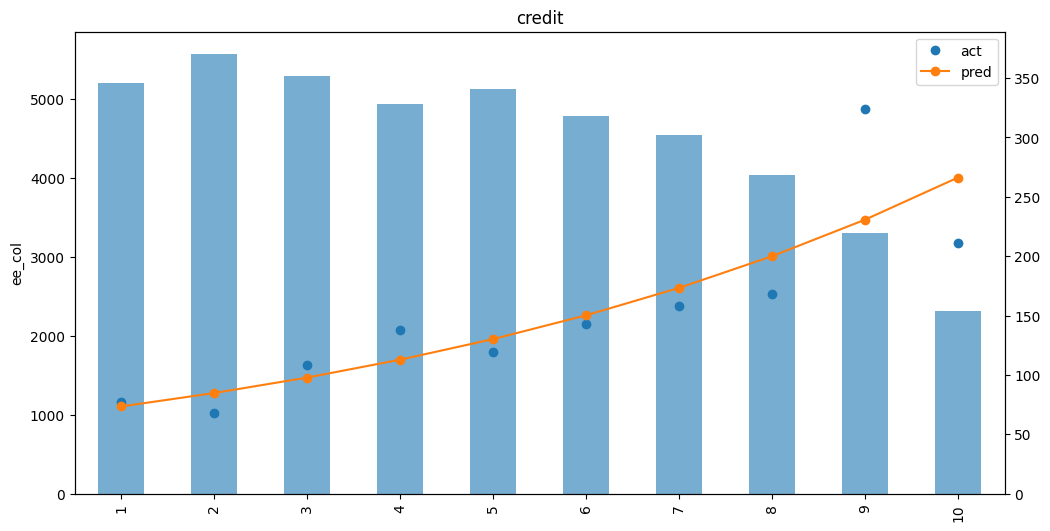

In [ ]:
### Check actual vs predicted on train

d_train['pred'] = glm_results.predict(X_train)
d_train['incurred_pred'] = d_train['pred']*d_train['ee_col']

resid_plot(d_train,'credit','incloss_col','incurred_pred','ee_col')

## Faster GLM formula creation & functions for GLM and Lift Chart

In [ ]:
### Expand to list of inputs as independent variables

# Need a nice way to create the model_construction formula

def list_to_string(lst):
    for i, v in enumerate(lst):
        s = v
        if i == 0:
            string = v
        else:
            string = string + ' + ' + v
    return string

var_list = ['credit']

model_construction = 'pp_col ~ ' + list_to_string(var_list)

model_construction

'pp_col ~ credit'

In [ ]:
### Make into a function

def run_glm(train,test,target,weight,var_list,glm_type = 'pp', tweedie_p = 1.4):
    """
    glm types: pp, lr, freq, sev
    """
    model_construction = target + ' ~ ' + list_to_string(var_list)

    y_train, X_train = dmatrices(model_construction, data=train, return_type='dataframe')
    y_test, X_test = dmatrices(model_construction, data=test, return_type='dataframe')

    if glm_type in ['pp','lr']:
      fam = sm.families.Tweedie(var_power=tweedie_p, link=sm.families.links.Log())
    elif glm_type == 'freq':
      fam = sm.families.Poisson(link=sm.families.links.Log())
    elif glm_type == 'sev':
      fam = sm.families.Gamma(link=sm.families.links.Log())
    else:
      raise ValueError(f"Unknown glm_type: {glm_type}")

    glm = sm.GLM(y_train, X_train, family=fam, var_weights=train[weight])

    glm_results = glm.fit()

    out_train = train.copy()
    out_train['pred'] = glm_results.predict(X_train)
    out_train['incurred_pred'] = out_train['pred']*out_train[weight]

    out_test = test.copy()
    out_test['pred'] = glm_results.predict(X_test)
    out_test['incurred_pred'] = out_test['pred']*out_test[weight]

    return {'out_train': out_train,'out_test': out_test, 'glm_results': glm_results}

In [ ]:
def create_decile(data,col):
  x = data[col]
  return np.minimum((np.maximum(x, 1) - 1) // 10 + 1, 10)

In [ ]:
### Add a new column, test our function

df2 = df.copy() # again make a copy and work with a clean dataframe
df2['pop_density_decile'] = create_decile(df2,'pop_density_ntile')

d_train, d_test = tt_split(df2,.80)

var_list = ['credit','pop_density_decile']

glm_out = run_glm(d_train,d_test,'pp_col','ee_col',var_list)

print(glm_out['glm_results'].summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 pp_col   No. Observations:                80135
Model:                            GLM   Df Residuals:                    80132
Model Family:                 Tweedie   Df Model:                            2
Link Function:                    Log   Scale:                          3228.0
Method:                          IRLS   Log-Likelihood:                -26373.
Date:                Wed, 18 Feb 2026   Deviance:                   5.7837e+06
Time:                        16:46:04   Pearson chi2:                 2.59e+08
No. Iterations:                    10   Pseudo R-squ. (CS):          0.0005505
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.9849      0

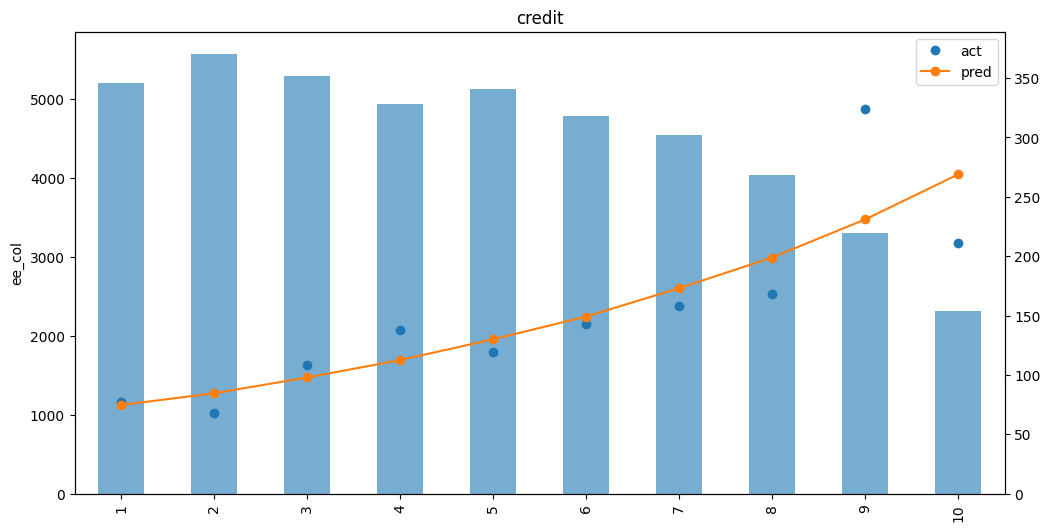

In [ ]:
resid_plot(glm_out['out_train'],'credit','incloss_col','incurred_pred','ee_col')

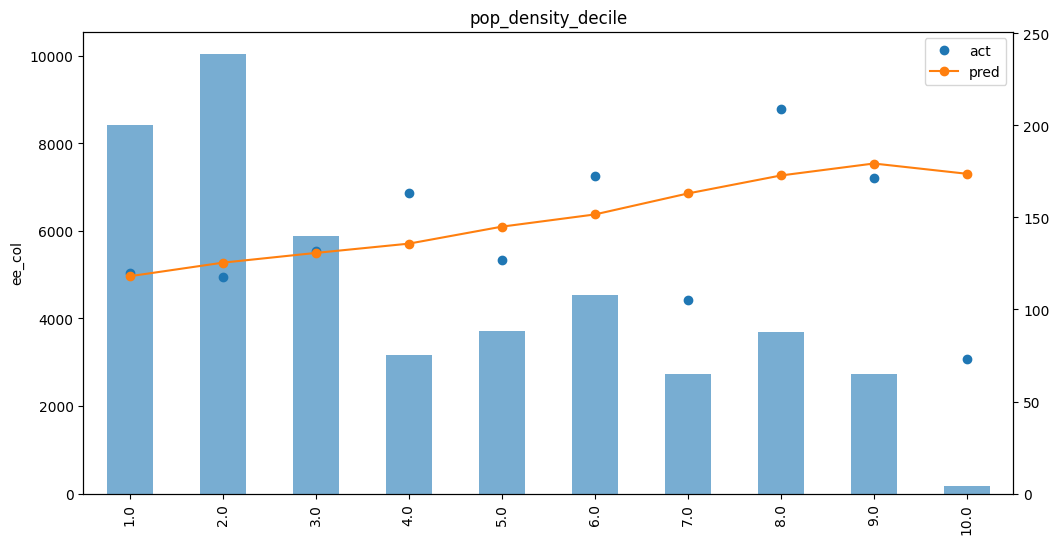

In [ ]:
resid_plot(glm_out['out_train'],'pop_density_decile','incloss_col','incurred_pred','ee_col')

In [ ]:
### Function works, now let's get a lift chart

def lift_chart(test_data, act, pred, weight, bins):
    test_data['decile'] = (round(test_data.sort_values(by = 'pred')[weight].cumsum()/test_data[weight].sum(),2)*bins).apply(np.floor)
    test_data['decile'] = np.where(test_data['decile'] + 1 > bins ,bins,test_data['decile'] + 1)
    x = test_data.groupby(['decile'], dropna = False).agg({weight: 'sum', act: 'sum', pred: 'sum'}).reset_index()

    x['act'] = x[act]/x[weight]
    x['pred'] = x[pred]/x[weight]
    x.drop(columns = [act,pred], inplace = True)

    dfg = x
    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    y_min = dfg[['act','pred']].min(axis = 1).min() * 0.95
    y_max = dfg[['act','pred']].max(axis = 1).max() * 1.05
    ax2.set_ylim(y_min,y_max)

    dfg[weight].plot.bar(stacked=False, ax=ax, alpha=0.6)
    dfg['act'].plot(kind='line', ax=ax2, marker='o', linewidth = 0, legend='act')
    dfg['pred'].plot(kind='line', ax=ax2, marker='o', legend='pred')

    ax.set_ylabel(weight)
    ax2.set_ylabel('Target')
    plt.show()
    print(x)

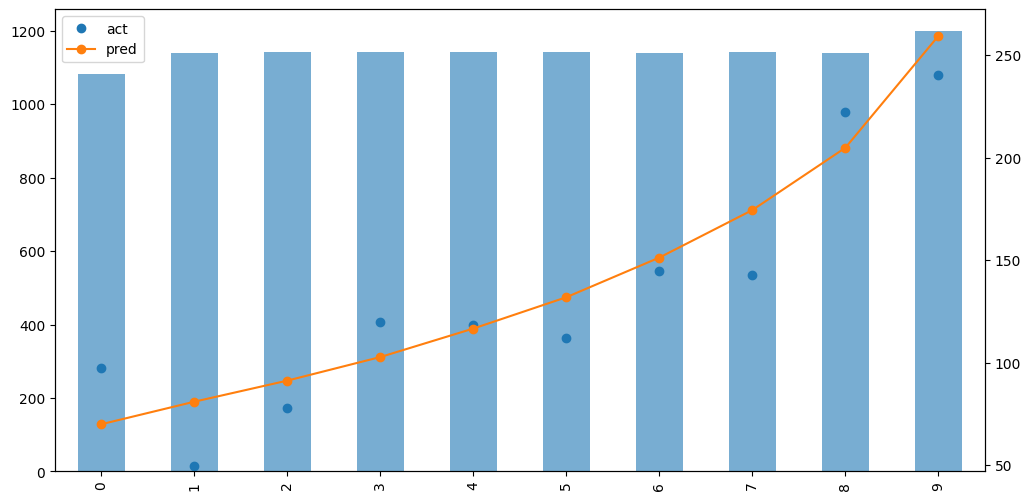

   decile   ee_col    act   pred
0    1.00 1,083.62  97.31  69.92
1    2.00 1,140.75  49.36  80.93
2    3.00 1,141.16  77.61  91.22
3    4.00 1,141.14 119.64 102.73
4    5.00 1,141.38 118.34 116.64
5    6.00 1,141.11 111.80 131.93
6    7.00 1,140.52 144.79 151.29
7    8.00 1,141.54 142.59 174.48
8    9.00 1,140.87 222.13 204.89
9   10.00 1,198.35 240.45 259.48


In [ ]:
lift_chart(glm_out['out_test'], 'incloss_col', 'incurred_pred', 'ee_col', 10)

## Widget for Residual Plots

In [ ]:
### Lift chart works, now let's get a widget for the residual plots

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(field):
    return resid_plot(glm_out['out_train'],field,'incloss_col','incurred_pred','ee_col')

interact(f, field = var_list);

interactive(children=(Dropdown(description='field', options=('credit', 'pop_density_decile'), value='credit'),…

In [ ]:
### Now we have the basic items needed to build the GLM

## Iterative GLM Building Process

In [ ]:
[i for i in df]

['pol_eff_year',
 'ep_bi',
 'ep_col',
 'ee_bi',
 'ee_col',
 'incloss_bi',
 'incloss_col',
 'cc_bi',
 'cc_col',
 'modelyear',
 'credit',
 'commute_flag',
 'veh_count_box',
 'driver_count_box',
 'veh_age_box',
 'coll_symb_ntile',
 'limit_bi',
 'ded_coll',
 'DrvAge_box',
 'male',
 'single',
 'widowed',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Severe_Accident_flag',
 'Other_Severe_Problem_flag',
 'Failed_Emissions_flag',
 'Nonsevere_Accident_flag',
 'Damage_flag',
 'Collision_Repair_Facility_flag',
 'Potential_Damage_flag',
 'Odometer_Problem_flag',
 'Repossession

In [ ]:
### Starting point setup

df2 = df.copy()
for col in ['coll_symb_ntile', 'diploma_ntile', 'pop_density_ntile', 'unemployment_ntile']:
  df2[col.replace('_ntile','_decile')] = create_decile(df2,col)

df2['vdr'] = df2['veh_count_box'] / df2['driver_count_box']

d_train, d_test = tt_split(df2,.80)

var_list = [
'pol_eff_year',
'credit',
'commute_flag',
# 'veh_count_box',
# 'driver_count_box',
'vdr', # preferred
'veh_age_box',
'coll_symb_ntile',
# 'coll_symb_decile',
'limit_bi',
'ded_coll',
'DrvAge_box',
'male',
'single',
'widowed',
'Modeled_Annual_Mileage',
'Modeled_Annual_Mileage_null_flag',
'Estimated_Current_Mileage',
'Estimated_Current_Mileage_null_flag',
'Annual_Mileage_Estimate',
'Annual_Mileage_Estimate_null_flag',
'Number_of_Titling_Transactions',
'Number_of_Titling_Transactions_null_flag',
'Lien_Holder',
'current_ownership_personal',
'current_ownership_lease',
'current_ownership_corp_govt',
'LOO_years',
'LOO_years_null_flag',
'personal_use_flag',
'rental_use_flag',
'comm_use_flag',
'fleet_use_flag',
'corp_use_flag',
'lease_flag',
'curr_owner_odo_cnt',
'curr_owner_odo_cnt_null_flag',
'all_owner_odo_cnt',
'all_owner_odo_cnt_null_flag',
'Severe_Problem_flag',
'Branded_Title_flag',
'Branded_Title_Loss_flag',
'Severe_Accident_flag',
'Other_Severe_Problem_flag',
'Failed_Emissions_flag',
'Nonsevere_Accident_flag',
'Damage_flag',
'Collision_Repair_Facility_flag',
'Potential_Damage_flag',
'Odometer_Problem_flag',
'Repossession_flag',
'CPO_flag',
'wtd_avg_travel_time',
'diploma_ntile',
# 'diploma_decile',
'pop_density_ntile',
# 'pop_density_decile',
'unemployment_ntile',
# 'unemployment_decile',
]

glm_out = run_glm(d_train,d_test,'pp_col','ee_col',var_list)

print(glm_out['glm_results'].summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 pp_col   No. Observations:                80135
Model:                            GLM   Df Residuals:                    80081
Model Family:                 Tweedie   Df Model:                           53
Link Function:                    Log   Scale:                          2181.3
Method:                          IRLS   Log-Likelihood:                -25245.
Date:                Wed, 18 Feb 2026   Deviance:                   5.5209e+06
Time:                        15:39:09   Pearson chi2:                 1.75e+08
No. Iterations:                    29   Pseudo R-squ. (CS):           0.002316
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Now, we evaluate p values & residual plots until we have a good fitting model on the individual features.  Then we will evaluate the lift chart and VIFs.  In class we will go through this together.  Below is a final version of the model fit.

In [ ]:
### helpers

def box_var(data,var,low,high):
    data[var] = np.where(data[var] > high, high, data[var])
    data[var] = np.where(data[var] < low, low, data[var])

def pvals_above_x(glm,threshold):
  a = glm.pvalues.reset_index()
  a = a.loc[a[0] > threshold]
  a = a.loc[~a['index'].str.endswith('_null_flag')]
  a = a.loc[a['index'] != 'Intercept']

  return a['index'].to_list()

In [ ]:
# Steps
# 1) fit with everything and remove all feats with p > .50
# 2) fit again and remove all feats with p > .20
# 3) review resid plots and make adjustments including feature range limitations and curves
# 3a) During this step, review resid plots, decide if need to make all p < .05 or accept feat relationships based on logical understanding
# 4) After we think all feats included should be and behave well, review lift chart

In [ ]:
df2 = df.copy()
for col in ['coll_symb_ntile', 'diploma_ntile', 'pop_density_ntile', 'unemployment_ntile']:
  df2[col.replace('_ntile','_decile')] = create_decile(df2,col)

df2['vdr'] = df2['veh_count_box'] / df2['driver_count_box']

# feature range adjustments
box_var(df2,'credit',2,8)
box_var(df2,'Modeled_Annual_Mileage',9e3,13e3)
box_var(df2,'pop_density_ntile',5,90)

# curve components
df2['veh_age_box_sq'] = np.power(df2['veh_age_box'],2) # this is not for a precise orthogonal polynomial fit.  Precise code is more robust/complex; not suitable for this initial training exercise.

d_train, d_test = tt_split(df2,.80)

var_list = [
'pol_eff_year',
'credit',
# 'commute_flag',
# 'veh_count_box',
# 'driver_count_box',
# 'vdr', # preferred
'veh_age_box', #'veh_age_box_sq', bad p values when tried to include the square component
# 'coll_symb_ntile',
'coll_symb_decile',
# 'limit_bi',
# 'ded_coll',
'DrvAge_box',
'male',
'single',
'widowed',
'Modeled_Annual_Mileage',
'Modeled_Annual_Mileage_null_flag',
# 'Estimated_Current_Mileage',
# 'Estimated_Current_Mileage_null_flag',
# 'Annual_Mileage_Estimate',
# 'Annual_Mileage_Estimate_null_flag',
# 'Number_of_Titling_Transactions',
# 'Number_of_Titling_Transactions_null_flag',
# 'Lien_Holder',
# 'current_ownership_personal',
# 'current_ownership_lease',
# 'current_ownership_corp_govt',
# 'LOO_years',
# 'LOO_years_null_flag',
# 'personal_use_flag',
# 'rental_use_flag',
# 'comm_use_flag',
# 'fleet_use_flag',
# 'corp_use_flag',
'lease_flag',
# 'curr_owner_odo_cnt',
# 'curr_owner_odo_cnt_null_flag',
# 'all_owner_odo_cnt', # this is positive but the data moves negative on average; this could be controlling for something else but I don't see the logical relationship
# 'all_owner_odo_cnt_null_flag',
# 'Severe_Problem_flag',
# 'Branded_Title_flag',
# 'Branded_Title_Loss_flag',
# 'Severe_Accident_flag',
# 'Other_Severe_Problem_flag',
# 'Failed_Emissions_flag',
# 'Nonsevere_Accident_flag',
# 'Damage_flag',
# 'Collision_Repair_Facility_flag',
# 'Potential_Damage_flag',
# 'Odometer_Problem_flag',
# 'Repossession_flag',
# 'CPO_flag',
# 'wtd_avg_travel_time',
# 'diploma_ntile',
# 'diploma_decile',
'pop_density_ntile',
# 'pop_density_decile', # tried this to improve P, got worse
# 'unemployment_ntile',
# 'unemployment_decile',
]

glm_out = run_glm(d_train,d_test,'pp_col','ee_col',var_list)

print(glm_out['glm_results'].summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 pp_col   No. Observations:                80135
Model:                            GLM   Df Residuals:                    80122
Model Family:                 Tweedie   Df Model:                           12
Link Function:                    Log   Scale:                          2034.8
Method:                          IRLS   Log-Likelihood:                -25088.
Date:                Wed, 18 Feb 2026   Deviance:                   5.5762e+06
Time:                        16:36:36   Pearson chi2:                 1.63e+08
No. Iterations:                    16   Pseudo R-squ. (CS):           0.002144
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
pvals_above_x(glm_out['glm_results'],.20)

['pol_eff_year',
 'veh_count_box',
 'driver_count_box',
 'ded_coll',
 'LOO_years',
 'curr_owner_odo_cnt',
 'Branded_Title_Loss_flag',
 'Severe_Accident_flag',
 'Failed_Emissions_flag',
 'Collision_Repair_Facility_flag',
 'unemployment_ntile']

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(field):
    return resid_plot(glm_out['out_train'],field,'incloss_col','incurred_pred','ee_col')

interact(f, field = var_list);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'credit', 'veh_age_box', 'coll_sy…

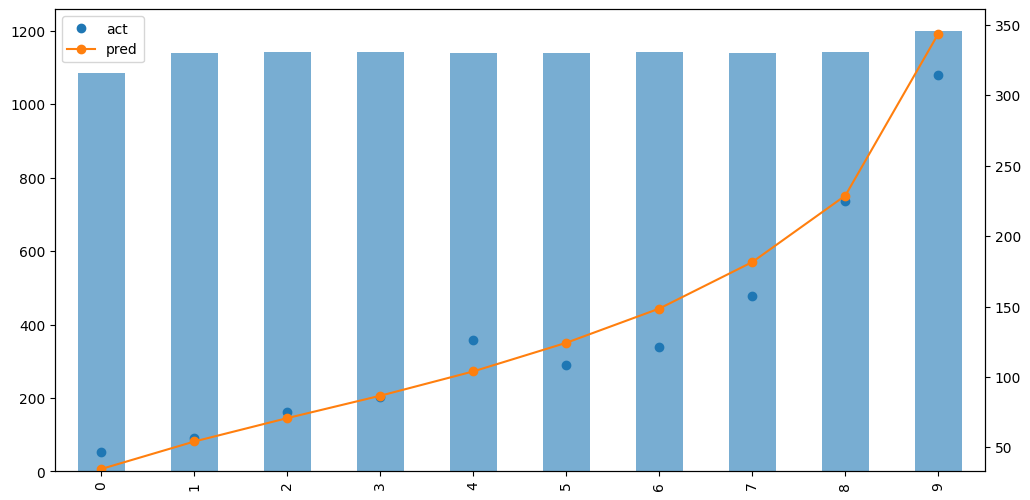

   decile   ee_col    act   pred
0    1.00 1,083.82  46.45  34.66
1    2.00 1,140.79  56.77  54.16
2    3.00 1,140.99  74.87  70.78
3    4.00 1,141.45  85.85  86.67
4    5.00 1,140.88 126.24 103.94
5    6.00 1,140.83 108.70 124.26
6    7.00 1,141.39 121.23 148.56
7    8.00 1,140.62 157.80 181.59
8    9.00 1,141.26 225.23 228.77
9   10.00 1,198.41 314.58 343.79


In [ ]:
lift_chart(glm_out['out_test'], 'incloss_col', 'incurred_pred', 'ee_col', 10)

In [ ]:
# Normally, we would go back and make more conservative selections particularly on the feature value ranges.  With this small thin dataset this lift chart is good enough for training purposes.

## Correlation Matrix & Variance Inflation Factors

In [ ]:
corr = d_train[(var_list)].corr()
corr.style.background_gradient(cmap='coolwarm')

,pol_eff_year,credit,veh_age_box,coll_symb_decile,DrvAge_box,male,single,widowed,Modeled_Annual_Mileage,Modeled_Annual_Mileage_null_flag,lease_flag,pop_density_ntile
pol_eff_year,1.000000,-0.036033,-0.004782,0.023661,0.027921,0.000017,-0.013873,0.025140,0.120035,-0.040707,0.038412,0.033055
credit,-0.036033,1.000000,-0.077581,0.042882,-0.303148,-0.020047,0.120583,-0.049983,0.061341,0.011322,0.103457,0.039331
veh_age_box,-0.004782,-0.077581,1.000000,-0.001654,0.054747,-0.002371,0.043277,0.020932,-0.611494,0.161099,-0.128351,-0.043842
coll_symb_decile,0.023661,0.042882,-0.001654,1.000000,-0.058101,0.024833,0.023679,-0.015755,-0.068371,-0.009579,0.023783,0.018082
DrvAge_box,0.027921,-0.303148,0.054747,-0.058101,1.000000,0.006997,-0.365268,0.236154,-0.069540,0.002631,-0.064929,-0.026942
male,0.000017,-0.020047,-0.002371,0.024833,0.006997,1.000000,-0.022332,-0.125785,-0.001984,0.000082,-0.015961,-0.022433
single,-0.013873,0.120583,0.043277,0.023679,-0.365268,-0.022332,1.000000,-0.134123,-0.043893,0.015512,0.014117,0.076008
widowed,0.025140,-0.049983,0.020932,-0.015755,0.236154,-0.125785,-0.134123,1.000000,-0.022451,0.008119,-0.013821,0.008319
Modeled_Annual_Mileage,0.120035,0.061341,-0.611494,-0.068371,-0.069540,-0.001984,-0.043893,-0.022451,1.000000,0.034549,0.045934,-0.144364
Modeled_Annual_Mileage_null_flag,-0.040707,0.011322,0.161099,-0.009579,0.002631,0.000082,0.015512,0.008119,0.034549,1.000000,-0.078671,-0.019074


In [ ]:
### VIF - looking to avoid numbers above 4 generally, although different people have different thresholds they use.  Below is definitely okay and we don't have any multicollinearity issues in this fit.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

model_vars = [i for i in var_list if 'null_flag' not in i]

df_vif = d_train[(model_vars)].copy()

X = add_constant(df_vif)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

,0
const,"1,954,403.09"
pol_eff_year,1.03
credit,1.12
veh_age_box,1.69
coll_symb_decile,1.01
DrvAge_box,1.32
male,1.02
single,1.17
widowed,1.08
Modeled_Annual_Mileage,1.75


# Practice Time!
### Choose a coverage (BI, Collision) and model type (Frequency, Severity, Pure Premium, Loss Ratio)
### Fit the GLM